## Chargement et préparation du jeu de données

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from matplotlib.pyplot import figure
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

RawData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv",sep=';')

RawData.columns = [
    'SpMax_L',
    'J_Dz(e)',
    'nHM',
    'F01[N-N]',
    'F04[C-N]',
    'NssssC',
    'nCb-',
    'C%',
    'nCp',
    'nO',
    'F03[C-N]',
    'SdssC',
    'HyWi_B(m)',
    'LOC',
    'SM6_L',
    'F03[C-O]',
    'Me','Mi',
    'nN-N',
    'nArNO2',
    'nCRX3',
    'SpPosA_B(p)',
    'nCIR',
    'B01[C-Br]',
    'BO3[C-Cl]',
    'N-073',
    'SpMax_A',
    'Psi_i_1d',
    'BO4[C-Br]',
    'SdO',
    'TI2_L',
    'nCrt',
    'C-026',
    'F02[C-N]',
    'nHDon',
    'SpMax_B(m)',
    ' Psi_i_A',
    'nN',
    'SM6_B(m)',
    'nArCOOR',
    'nX',
    'experimental class' #C'est la variable que l'on cherche à expliquer : 0 la molécule est prête à être biodégradée, 1 la molécule n'est pas prête à être biodégradée
    ]

check_for_nan = RawData.isnull().values.any()
if (check_for_nan):
    print ("Il y a des valeurs nulles dans le DataSet !")
else:
    print ("Il n'y a aucune valeur nulle dans le DataSet.")

Il n'y a aucune valeur nulle dans le DataSet.


In [ ]:
Dataset = RawData[
    [
    'SpMax_L',
    'J_Dz(e)',
    'nHM',
    'F01[N-N]',
    'F04[C-N]',
    'NssssC',
    'nCb-',
    'C%',
    'nCp',
    'nO',
    'F03[C-N]',
    'SdssC',
    'HyWi_B(m)',
    'LOC',
    'SM6_L',
    'F03[C-O]',
    'Me','Mi',
    'nN-N',
    'nArNO2',
    'nCRX3',
    'SpPosA_B(p)',
    'nCIR',
    'B01[C-Br]',
    'BO3[C-Cl]',
    'N-073',
    'SpMax_A',
    'Psi_i_1d',
    'BO4[C-Br]',
    'SdO',
    'TI2_L',
    'nCrt',
    'C-026',
    'F02[C-N]',
    'nHDon',
    'SpMax_B(m)',
    ' Psi_i_A',
    'nN',
    'SM6_B(m)',
    'nArCOOR',
    'nX',
    'experimental class' #C'est la variable que l'on cherche à expliquer : 0 la molécule est prête à être biodégradée, 1 la molécule n'est pas prête à être biodégradée
    ]
]
Dataset["experimental class"].replace({"RB": 1, "NRB": 0}, inplace=True)


<AxesSubplot:xlabel='TI2_L', ylabel='experimental class'>

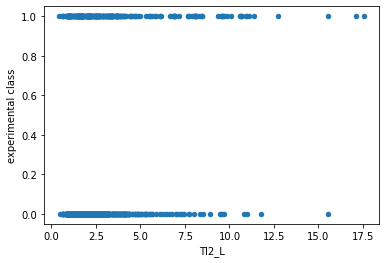

In [ ]:
Dataset.plot.scatter('TI2_L','experimental class')

In [ ]:
corr = Dataset.corr()
corr


,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
SpMax_L,1.000000,0.232298,0.261422,0.021996,0.185165,0.446929,0.422724,0.381057,0.202941,0.259444,...,0.311322,0.137149,0.032386,0.304680,0.099390,0.055935,0.488967,0.086801,0.339561,-0.394873
J_Dz(e),0.232298,1.000000,0.067451,-0.094448,-0.186311,0.351113,-0.260890,-0.300433,0.150926,0.192500,...,-0.113738,-0.181845,0.009341,0.085494,0.513356,-0.089291,0.087484,-0.071937,0.389915,-0.001296
nHM,0.261422,0.067451,1.000000,0.022107,0.003156,0.067990,0.258191,0.097704,-0.121950,-0.107479,...,0.438962,-0.037019,-0.135432,0.458764,0.051240,-0.043030,0.572369,-0.044207,0.542642,-0.298768
F01[N-N],0.021996,-0.094448,0.022107,1.000000,0.449365,0.006680,0.191345,-0.039013,0.024713,0.032897,...,0.212598,0.501343,0.134796,-0.005754,0.023116,0.462627,0.040250,-0.015168,0.000702,-0.103166
F04[C-N],0.185165,-0.186311,0.003156,0.449365,1.000000,0.001821,0.372286,0.146231,0.007564,0.085743,...,0.328985,0.789318,0.209477,0.040908,-0.030830,0.745668,0.146743,-0.043322,-0.021165,-0.234297
NssssC,0.446929,0.351113,0.067990,0.006680,0.001821,1.000000,0.078940,-0.062217,0.450951,0.042581,...,-0.030562,-0.037885,0.017306,0.014565,0.299689,-0.077156,0.121026,-0.037890,0.676168,-0.170255
nCb-,0.422724,-0.260890,0.258191,0.191345,0.372286,0.078940,1.000000,0.599074,0.135867,0.115341,...,0.800254,0.330459,0.113345,0.223820,-0.077206,0.183444,0.402301,0.112344,0.126789,-0.336685
C%,0.381057,-0.300433,0.097704,-0.039013,0.146231,-0.062217,0.599074,1.000000,-0.225022,-0.147246,...,0.409064,0.095168,-0.238199,0.149238,-0.251060,-0.092338,0.280069,0.117286,0.046462,-0.201004
nCp,0.202941,0.150926,-0.121950,0.024713,0.007564,0.450951,0.135867,-0.225022,1.000000,0.189529,...,-0.075703,-0.030887,0.012700,-0.017559,-0.179163,-0.109045,0.032339,-0.021646,-0.046110,-0.056620
nO,0.259444,0.192500,-0.107479,0.032897,0.085743,0.042581,0.115341,-0.147246,0.189529,1.000000,...,0.104196,0.057987,0.200055,-0.034474,0.341198,0.025412,0.109371,0.217071,-0.121916,0.178789


# Correlation matrix

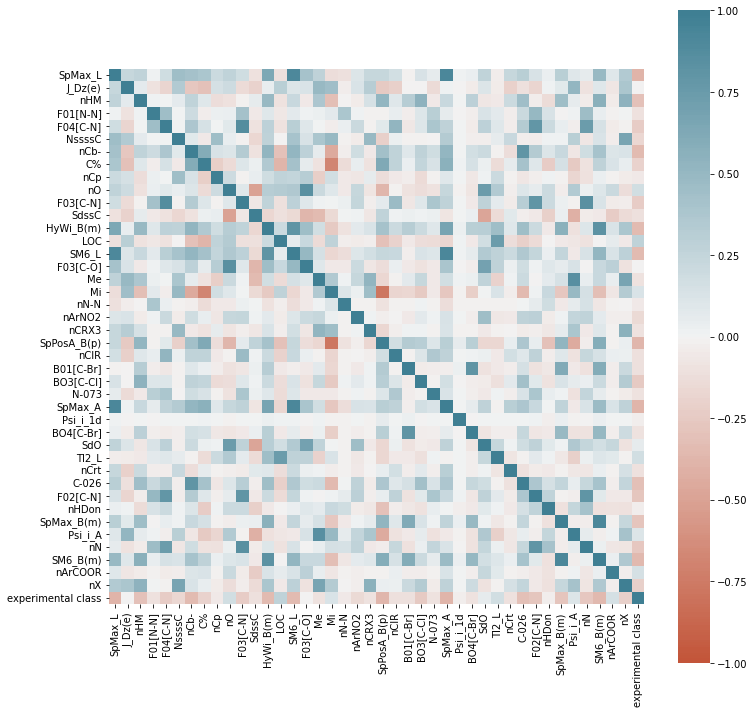

In [ ]:
ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
ordered_corr = corr['experimental class'].abs().sort_values(ascending=False)
subdata = Dataset[ordered_corr[1:11].index]
Dataset = Dataset[ordered_corr.index]
subdata

,SpMax_L,SpMax_A,SpPosA_B(p),SM6_B(m),HyWi_B(m),SM6_L,nCb-,C-026,nHM,SpMax_B(m)
0,4.170,2.214,1.104,7.257,2.461,8.723,0,0,0,3.315
1,3.932,1.942,1.092,7.601,3.279,9.110,0,0,0,3.076
2,3.000,1.414,1.024,6.690,2.100,6.594,0,0,0,3.046
3,4.236,1.985,1.137,8.003,3.449,9.528,0,0,0,3.351
4,4.236,1.980,1.119,7.904,3.313,9.383,0,0,0,3.351
...,...,...,...,...,...,...,...,...,...,...
1049,5.431,2.394,1.232,8.088,3.233,10.681,0,0,0,3.573
1050,5.287,2.462,1.178,9.278,4.319,11.029,0,0,0,3.787
1051,4.869,2.314,1.261,9.537,4.435,11.072,5,4,0,3.848
1052,5.158,2.622,1.410,11.055,4.902,11.817,9,1,2,5.808


Here we sort the explanatory variables according to their impact on the "experimental class" variable.

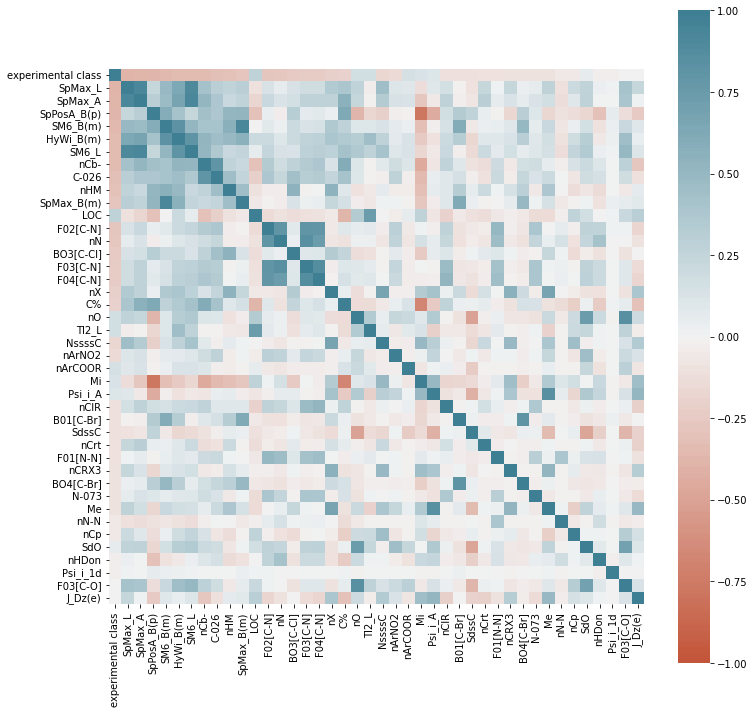

In [ ]:
corr = Dataset.corr()
corr

ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Here we can understand many things : 
- The features SpMax_A and SpMax_L are highly correlated, and they are the two most correlated features to our target. It is easyly explainable : they are both Leading Eigenvalue from different matrix (Laplace and Adjacency matrix). Therefor, they are calculated in a similar way and their values are quite the same.

- The features F03[C-N], F04[C-N], F02[C-N] and nN are highly correlated. They are all related to the Nitrogen atoms : F02, F03, F04 are the Frequency of C-N at topological distance 2,3,4, and nN is the number of nitrogen atoms. They affect the ability of the molecule to be biodegradable negtively, therefore we can guess that the presence of Nitrogen in a molecule is bad for it's decomposition. 

- Also, we can see that nCB- and nHM have a bad influence on the biodegrability of the molecule. They are respectively the number of substituted benzene C and the number of heavy atoms. We already know that having a great number of nitrogen (N) is bad. We can then guess that the presence of too many non organic atoms, or complex structures can prevent the molecule for being biodegradable. Hoever, a big number of oxygen atoms helps the molecule to be biodegradable (as seen with the variance between nO and experimental class)

- The feature 'Psi_i_1d' isn't correlated to any other feature. It is definded as "Intrinsic state pseudoconnectivity index", we don't have the skills in chemestry to analyse this information...

<Figure size 432x288 with 0 Axes>

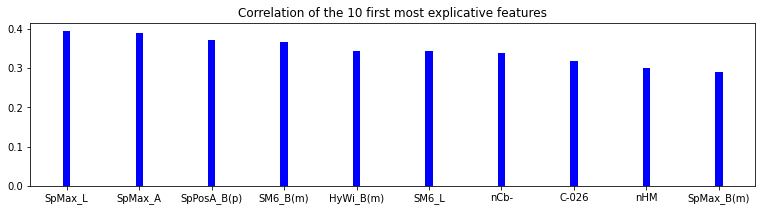

<Figure size 150x150 with 0 Axes>

Max is reached on the 1 th bar : 0.39 , by SpMax_L


In [ ]:
fig = plt.figure()

x = ['SpMax_L',
'SpMax_A',
'SpPosA_B(p)',
'SM6_B(m)',
'HyWi_B(m)',
'SM6_L',
'nCb-',
'C-026',
'nHM',
'SpMax_B(m)']
height = []
for i in range (10):
    height.append(abs(corr.iloc[1:11,0][i]))
width = 0.1
f = plt.figure()
f.set_figwidth(13)
f.set_figheight(3)
plt.title('Correlation of the 10 first most explicative features')
plt.bar(x, height, width, color='b')
figure(figsize=(1, 1), dpi=150)
plt.show()
print('Max is reached on the', index0+1,'th bar :',round(abs(corr.iloc[1:11,0][0]),2) ,', by SpMax_L')

## ACP

In [ ]:
features = ['SpMax_L',
    'J_Dz(e)',
    'nHM',
    'F01[N-N]',
    'F04[C-N]',
    'NssssC',
    'nCb-',
    'C%',
    'nCp',
    'nO',
    'F03[C-N]',
    'SdssC',
    'HyWi_B(m)',
    'LOC',
    'SM6_L',
    'F03[C-O]',
    'Me','Mi',
    'nN-N',
    'nArNO2',
    'nCRX3',
    'SpPosA_B(p)',
    'nCIR',
    'B01[C-Br]',
    'BO3[C-Cl]',
    'N-073',
    'SpMax_A',
    'Psi_i_1d',
    'BO4[C-Br]',
    'SdO',
    'TI2_L',
    'nCrt',
    'C-026',
    'F02[C-N]',
    'nHDon',
    'SpMax_B(m)',
    ' Psi_i_A',
    'nN',
    'SM6_B(m)',
    'nArCOOR',
    'nX']

x = Dataset.loc[:, features].values
y = Dataset.loc[:, ['experimental class']].values

x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Dataset[['experimental class']]], axis = 1)


In [ ]:
pca.explained_variance_ratio_

array([0.18031265, 0.12271405])

Ici, on remarque que la variance expliquée par les deux dimensions de l'ACP ne représente qu'à peine 30% de la variation de "experimental class". Il n'est donc pas pertinent de visualiser notre système en deux dimensions grâce à l'ACP.

# Normalization

In [ ]:
sc = StandardScaler()
subdatanormalized = sc.fit_transform(Dataset)
print(np.mean(subdatanormalized,axis=0))

[-1.34827844e-16 -1.22693338e-15  7.14587571e-16  1.34827844e-15
 -1.17300224e-15  3.77517962e-16 -1.21345059e-15 -1.34827844e-17
 -4.04483531e-17  0.00000000e+00 -5.99983904e-16 -2.02241765e-17
 -4.04483531e-17  0.00000000e+00 -6.74139218e-18 -1.34827844e-17
 -5.39311374e-17  2.69655687e-17 -1.55052020e-16  4.88750933e-17
 -1.23030407e-16  3.37069609e-17  1.01120883e-17  2.02241765e-17
 -7.84866585e-15  4.92121629e-16  4.04483531e-17  3.70776570e-17
  2.69655687e-17  6.74139218e-18  0.00000000e+00  2.86509168e-17
  4.38190492e-17 -3.03362648e-17 -3.37069609e-17  2.52802207e-17
 -2.69655687e-17 -2.42690118e-16  2.35948726e-17  3.37069609e-18
  2.02241765e-17 -2.69655687e-17]




We check that the average of each feature is zero (or very close to 0)

In [ ]:
print(np.std(subdatanormalized,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



The standard deviation is 1 for each feature

In [ ]:
pca = PCA(svd_solver='full')
coord = pca.fit_transform(subdatanormalized)
print(pca.n_components_) 

42


In [ ]:
print(pca.explained_variance_ratio_)

[1.81550851e-01 1.20287802e-01 1.08525240e-01 8.24771823e-02
 5.95509551e-02 5.59851161e-02 3.67190323e-02 3.40457299e-02
 3.24420908e-02 2.98842894e-02 2.50490618e-02 2.37610910e-02
 2.26299763e-02 2.16500380e-02 1.91408538e-02 1.70836414e-02
 1.59382295e-02 1.45343793e-02 1.40247212e-02 1.11023627e-02
 9.31852501e-03 9.04678108e-03 7.17917542e-03 6.56187695e-03
 6.12500928e-03 5.17776897e-03 4.32468313e-03 4.07818095e-03
 3.66864350e-03 3.51192645e-03 2.56055542e-03 2.38338723e-03
 2.03598370e-03 1.64696032e-03 1.60694898e-03 1.33296851e-03
 1.01658934e-03 7.38849573e-04 5.39169238e-04 4.39751606e-04
 2.39279912e-04 8.43418879e-05]


We look at the proportion of the explained variance of each feature

In [ ]:
eigval = (pca.n_components_-1)/pca.n_components_*pca.explained_variance_
print(len(eigval))


42


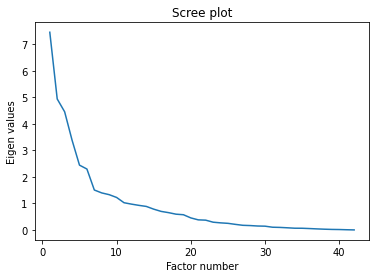

In [ ]:
plt.plot(np.arange(1,43),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

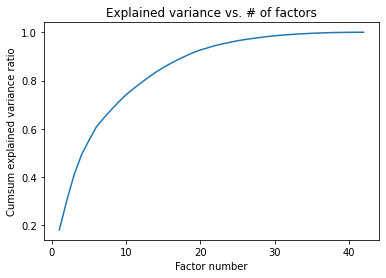

In [ ]:
plt.plot(np.arange(1,43),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [ ]:
bs = 1/np.arange(42,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [ ]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     7.450654  4.326743
1     4.936483  3.326743
2     4.453760  2.826743
3     3.384776  2.493409
4     2.443908  2.243409
5     2.297570  2.043409
6     1.506910  1.876743
7     1.397201  1.733886
8     1.331389  1.608886
9     1.226419  1.497775
10    1.027987  1.397775
11    0.975130  1.306865
12    0.928710  1.223532
13    0.888495  1.146609
14    0.785520  1.075180
15    0.701094  1.008514
16    0.654088  0.946014
17    0.596475  0.887190
18    0.575560  0.831635
19    0.455629  0.779003
20    0.382422  0.729003
21    0.371270  0.681384
22    0.294626  0.635930
23    0.269292  0.592451
24    0.251364  0.550785
25    0.212490  0.510785
26    0.177480  0.472323
27    0.167364  0.435286
28    0.150557  0.399572
29    0.144126  0.365089
30    0.105082  0.331756
31    0.097812  0.299498
32    0.083555  0.268248
33    0.067589  0.237945
34    0.065947  0.208533
35    0.054704  0.179961
36    0.041720  0.152184
37    0.030322  0.125157
38    0.022127  0.098841


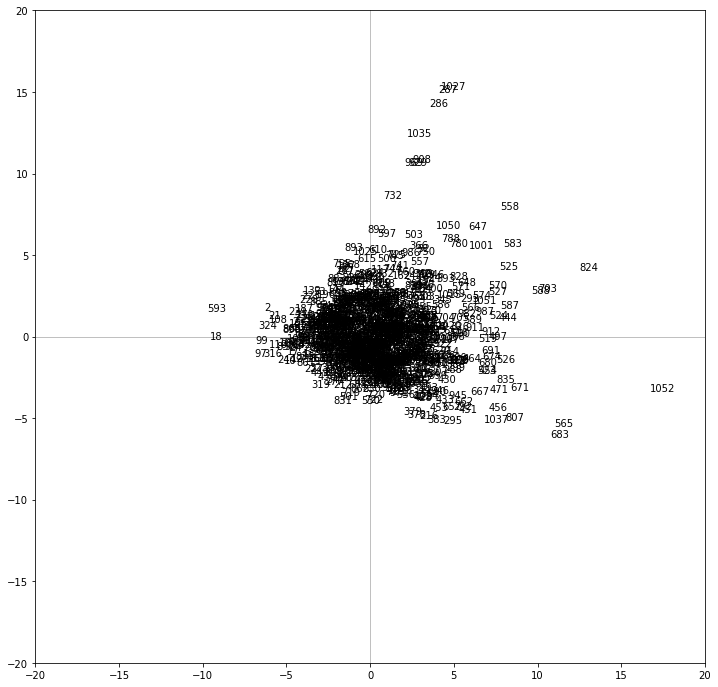

In [ ]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-20,20) #même limites en abscisse
axes.set_ylim(-20,20) #et en ordonnée

#placement des étiquettes des observations
n = len(Dataset)
for i in range(n):
 plt.annotate(Dataset.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-20,20],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-20,20],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()


In [ ]:
di = np.sum(subdatanormalized**2,axis=1)
print(pd.DataFrame({'ID':Dataset.index,'d_i':di}))

        ID          d_i
0        0    21.178182
1        1    21.811662
2        2   126.179974
3        3    17.587603
4        4    16.845362
...    ...          ...
1049  1049    25.837341
1050  1050   137.700036
1051  1051   129.509326
1052  1052  1578.195102
1053  1053    23.893754

[1054 rows x 2 columns]


In [ ]:
cos2 = coord**2
p = 42
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':Dataset.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1    COS2_2
0        0  0.621039  0.032785
1        1  0.596024  0.055870
2        2  0.317196  0.020871
3        3  0.417039  0.097153
4        4  0.504301  0.110059
...    ...       ...       ...
1049  1049  0.001652  0.002993
1050  1050  0.110796  0.319073
1051  1051  0.284544  0.033174
1052  1052  0.177245  0.007189
1053  1053  0.168396  0.394393

[1054 rows x 3 columns]


In [ ]:
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':Dataset.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))


        id     CTR_1     CTR_2
0        0  0.001675  0.000133
1        1  0.001655  0.000234
2        2  0.005097  0.000506
3        3  0.000934  0.000328
4        4  0.001082  0.000356
...    ...       ...       ...
1049  1049  0.000005  0.000015
1050  1050  0.001943  0.008444
1051  1051  0.004693  0.000826
1052  1052  0.035621  0.002181
1053  1053  0.000512  0.001811

[1054 rows x 3 columns]


In [ ]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]


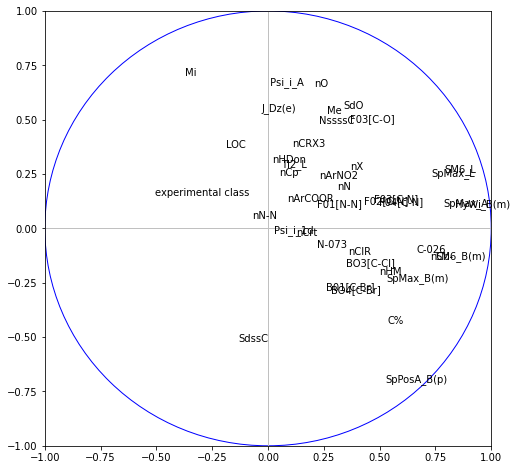

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(Dataset.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()


In [ ]:
cos2var = corvar**2
print(pd.DataFrame({'id':Dataset.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                    id    COS2_1    COS2_2
0   experimental class  0.256117  0.022468
1              SpMax_L  0.533432  0.057984
2              SpMax_A  0.615755  0.010850
3          SpPosA_B(p)  0.277723  0.500599
4             SM6_B(m)  0.563860  0.019245
5            HyWi_B(m)  0.702489  0.010074
6                SM6_L  0.624472  0.067079
7                 nCb-  0.526232  0.020595
8                C-026  0.445455  0.012348
9                  nHM  0.249562  0.044840
10          SpMax_B(m)  0.279088  0.057972
11                 LOC  0.035832  0.138119
12            F02[C-N]  0.184334  0.013025
13                  nN  0.094980  0.031054
14           BO3[C-Cl]  0.122557  0.029362
15            F03[C-N]  0.226645  0.015336
16            F04[C-N]  0.245161  0.011566
17                  nX  0.135754  0.072790
18                  C%  0.285855  0.193385
19                  nO  0.043279  0.422152
20               TI2_L  0.003340  0.079113
21              NssssC  0.052580  0.231017
22         

In [ ]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':Dataset.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                    id     CTR_1     CTR_2
0   experimental class  0.034375  0.004551
1              SpMax_L  0.071595  0.011746
2              SpMax_A  0.082644  0.002198
3          SpPosA_B(p)  0.037275  0.101408
4             SM6_B(m)  0.075679  0.003898
5            HyWi_B(m)  0.094286  0.002041
6                SM6_L  0.083814  0.013588
7                 nCb-  0.070629  0.004172
8                C-026  0.059787  0.002501
9                  nHM  0.033495  0.009083
10          SpMax_B(m)  0.037458  0.011744
11                 LOC  0.004809  0.027979
12            F02[C-N]  0.024741  0.002638
13                  nN  0.012748  0.006291
14           BO3[C-Cl]  0.016449  0.005948
15            F03[C-N]  0.030419  0.003107
16            F04[C-N]  0.032905  0.002343
17                  nX  0.018220  0.014745
18                  C%  0.038366  0.039175
19                  nO  0.005809  0.085517
20               TI2_L  0.000448  0.016026
21              NssssC  0.007057  0.046798
22         

# ACP with 10 first most explicative features

In [ ]:
features = ['SpMax_L', 'SpMax_A', 'SpPosA_B(p)', 'SM6_B(m)', 'HyWi_B(m)', 'SM6_L', 'nCb-',
 'C-026', 'nHM', 'SpMax_B(m)']

x10 = Dataset.loc[:, features].values
y10 = Dataset.loc[:, ['experimental class']].values

x10 = StandardScaler().fit_transform(x10)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x10)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, Dataset[['experimental class']]], axis = 1)

pca.explained_variance_ratio_

array([0.54052003, 0.17517231])

# Machine Learning

In [ ]:
count1 = np.count_nonzero(y == 1)
count0 = np.count_nonzero(y == 0)
y_train_count0 = 0
y_train_count1 = 0

while (y_train_count0 < 3*count0/4 or y_train_count1 < count1/4):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    y_train_count1 = np.count_nonzero(y_train == 1)
    y_train_count0 = np.count_nonzero(y_train == 0)
    print(y_train_count0,y_train_count1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

527 263
(790, 41)
(264, 41)
(790, 1)
(264, 1)


In [ ]:
def test_hyperparametres(algo, hyperparametres):
    grid       = grid_search.GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

# PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression


PLS = PLSRegression(n_components=2)
PLS.fit(x_train, y_train)
y_pred_PLS = PLS.predict(x_test)

y_proba_PLS = y_pred_PLS.copy()
y_proba_PLS_2 = 1 - y_proba_PLS  
y_proba_PLS = np.concatenate((y_proba_PLS,y_proba_PLS_2),axis=1)
y_proba_PLS = np.fliplr(y_proba_PLS)
y_proba_PLS[y_proba_PLS>1]=1
y_proba_PLS[y_proba_PLS<0]=0

y_pred_PLS[y_pred_PLS>=0.5]=1
y_pred_PLS[y_pred_PLS<0.5]=0
y_pred_PLS = y_pred_PLS.flatten().astype(int)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_PLS)*100,"%")
#Les valeurs prédites sont parfois négatives

Accuracy: 85.60606060606061 %


In [ ]:
grid_param = {
    'n_components' : [2]
}
gs = GridSearchCV(PLSRegression(n_components=2),grid_param,
verbose=1,cv=3, n_jobs = -1)

gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


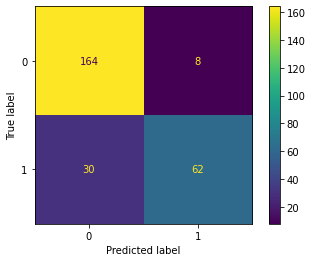

In [ ]:
cm_PLS = confusion_matrix(y_test, y_pred_PLS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PLS)
disp.plot()
plt.show()

In [ ]:
f1_PLS = f1_score(y_test, y_pred_PLS, average=None)
score_PLS = metrics.accuracy_score(y_test, y_pred_PLS)
cr_PLS = classification_report(y_test, y_pred_PLS)

# KNN :

In [ ]:
grid_param = {
    'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(),
grid_param, verbose=1,cv=3, n_jobs = -1)

gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 76 candidates, totalling 228 fits
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
model = KNeighborsClassifier(n_neighbors = gs_results.best_params_['n_neighbors'])
model.fit(x_train,y_train)
y_pred_KNN = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_KNN)*100,"%")
print(model.get_params(deep=True))

Accuracy: 87.5 %
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


print("\nOn cherche notre meilleur k:\n")  
maxi=0
meilleur_k=0

for k in range (3,40):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train[:,0:15],np.ravel(y_train,order='C'))
    y_pred = model.predict(x_test[:,0:15])
    precision = metrics.accuracy_score(y_test, y_pred)
    #precision = model.score(x_test, y_test)
    round(precision,2)
    print(round(precision,3)*100,"% de précision avec k=",k,".\n")
    if(precision>maxi):
        meilleur_k=k
        maxi=precision
print("Le k le plus précis est", meilleur_k)
print(model.predict_proba(x_train[:,0:15]))

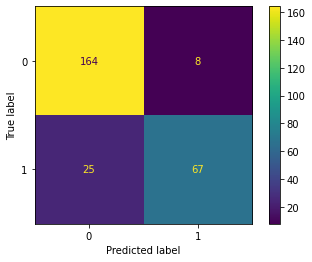

In [ ]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot()
plt.show()

In [ ]:
f1_KNN = f1_score(y_test, y_pred_KNN, average=None)
y_proba_KNN = model.predict_proba(x_test)
score_KNN = model.score(x_test, y_test)
cr_KNN = classification_report(y_test, y_pred_KNN)

# SVC

In [ ]:


param = {
    'C'      : [0.5,1,1.5,1.65,1.7,1.75,1.9,2],
    'gamma'  : [0.5, 0.1, 0.15]     
}
gs = GridSearchCV(svm.SVC(),
param, verbose=1,cv=3, n_jobs = -1)
gs_results = gs.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gs_results.best_params_

{'C': 1.7, 'gamma': 0.1}

In [ ]:
model = svm.SVC(probability=True,
        C= gs_results.best_params_['C'],
        gamma = gs_results.best_params_['gamma'])

model.fit(x_train,y_train)
y_proba_SVC = model.predict_proba(x_test)

y_pred_SVC = model.predict(x_test)

#y_pred_SVC[y_pred_SVC>=0.5]=1
#y_pred_SVC[y_pred_SVC<0.5]=0

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVC)*100,"%")


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


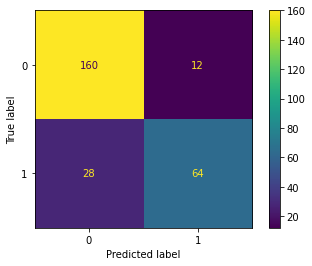

In [ ]:
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVC)
disp.plot()
plt.show()

In [ ]:
f1_SVC = f1_score(y_test, y_pred_SVC, average=None)
score_SVC = model.score(x_test, y_test)
cr_SVC = classification_report(y_test, y_pred_SVC)

# SGDClassifier

In [ ]:
sgdc = SGDClassifier(max_iter=1000, tol=0.01, loss="modified_huber")
sgdc.fit(x_train, y_train)
y_pred_SGDC = sgdc.predict(x_test)
score = sgdc.score(x_train, y_train)
print("Training score: ", score) 
score_SGDC = sgdc.score(x_test, y_test)
print("Test score: ", score_SGDC) 

Training score:  0.8455696202531645
Test score:  0.875
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


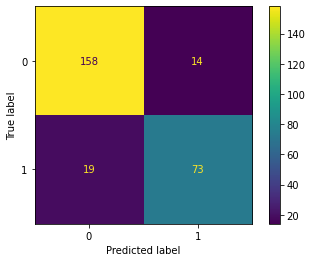

In [ ]:
cm_SGDC = confusion_matrix(y_test, y_pred_SGDC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SGDC)
disp.plot()
plt.show()

In [ ]:
f1_SGDC = f1_score(y_test, y_pred_SGDC, average=None)
y_proba_SGDC = sgdc.predict_proba(x_test)
score_SGDC = sgdc.score(x_test, y_test)
cr_SGDC = classification_report(y_test, y_pred_SGDC)

# Comparaison between our algos

In [ ]:
print('classification report for PLS : ')
print(cr_PLS)
print('classification report for KNN : ')
print(cr_KNN)
print('classification report for SVC : ')
print(cr_SVC)
print('classification report for SGDClassifier : ')
print(cr_SGDC)

print()
print('PLS score :', score_PLS,', KNN score :', score_KNN,', SVC score :', score_SVC,', SGDClassifier score :', score_SGDC)

classification report for PLS : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       172
           1       0.89      0.67      0.77        92

    accuracy                           0.86       264
   macro avg       0.87      0.81      0.83       264
weighted avg       0.86      0.86      0.85       264

classification report for KNN : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       172
           1       0.89      0.73      0.80        92

    accuracy                           0.88       264
   macro avg       0.88      0.84      0.86       264
weighted avg       0.88      0.88      0.87       264

classification report for SVC : 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       172
           1       0.84      0.70      0.76        92

    accuracy                           0.85       264
   macro avg       0.85      

In [ ]:
f1 = {'Knn': f1_KNN,'PLS': f1_PLS,'SGDC':f1_SGDC,'SVC': f1_SVC}
f1_0 = (f1_KNN[0],f1_PLS[0],f1_SGDC[0],f1_SVC[0])
f1_1 = (f1_KNN[1],f1_PLS[1],f1_SGDC[1],f1_SVC[1])
keys = []
for key in f1:
    keys.append(key)
keys
maxvalue0=max(f1_0)
index0 = (f1_0).index(maxvalue0)
name0 = keys[index0]
print('Maximum value for the classification of the non biodegradable molecules (0) is:', maxvalue0, ", reached by:", name0)

maxvalue1=max(f1_1)
index1 = (f1_1).index(maxvalue1)
name1 = keys[index1]
print('Maximum value for the classification of the biodegradable molecules (1) is:', maxvalue1, ", reached by:", name1)

Maximum value for the classification of the non biodegradable molecules (0) is: 0.9085872576177285 , reached by: Knn
Maximum value for the classification of the biodegradable molecules (1) is: 0.8156424581005586 , reached by: SGDC


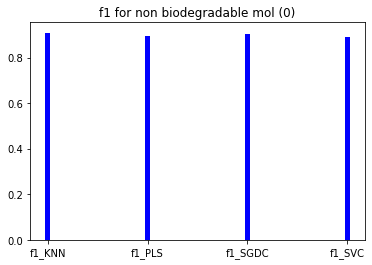

Max is reached on the 1 th bar ( 0.91 %) by the Knn


In [ ]:
fig = plt.figure()

x = ['f1_KNN','f1_PLS','f1_SGDC','f1_SVC']
height = [f1_KNN[0],f1_PLS[0],f1_SGDC[0],f1_SVC[0]]
width = 0.05
plt.title('f1 for non biodegradable mol (0)')
plt.bar(x, height, width, color='b' )
plt.show()
print('Max is reached on the', index0+1,'th bar (',round(maxvalue0,2) ,'%) by the', name0 )

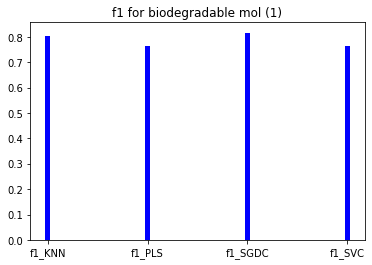

Max is reached on the 3 th bar ( 0.82 %) by the SGDC


In [ ]:
fig = plt.figure()

x = ['f1_KNN','f1_PLS','f1_SGDC','f1_SVC']
height = [f1_KNN[1],f1_PLS[1],f1_SGDC[1],f1_SVC[1]]
width = 0.05
plt.title('f1 for biodegradable mol (1)')
plt.bar(x, height, width, color='b' )
plt.show()
print('Max is reached on the', index1+1,'th bar (',round(maxvalue1,2) ,'%) by the', name1 )

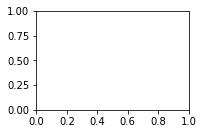

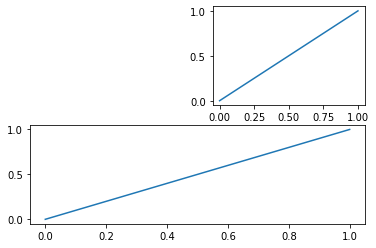

In [ ]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

pl.figure()
ax = pl.subplot(gs[0, 0]) # row 0, col 0
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot()

ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.plot([0,1])

ax = pl.subplot(gs[1, :]) # row 1, span all columns
pl.plot([0,1])

# Mean of our algorithms

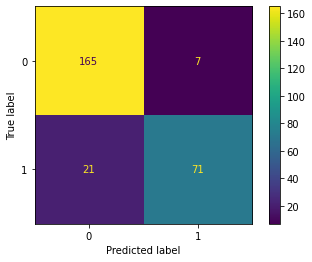

In [ ]:
y_proba_global = np.mean( np.array([y_proba_SVC[:,1]  ,y_proba_PLS[:,1] ,y_proba_KNN[:,1]]), axis=0 )
y_proba_global[y_proba_global>=0.5]=1
y_proba_global[y_proba_global<0.5]=0

cm_global = confusion_matrix(y_test, y_proba_global)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_global)
disp.plot()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


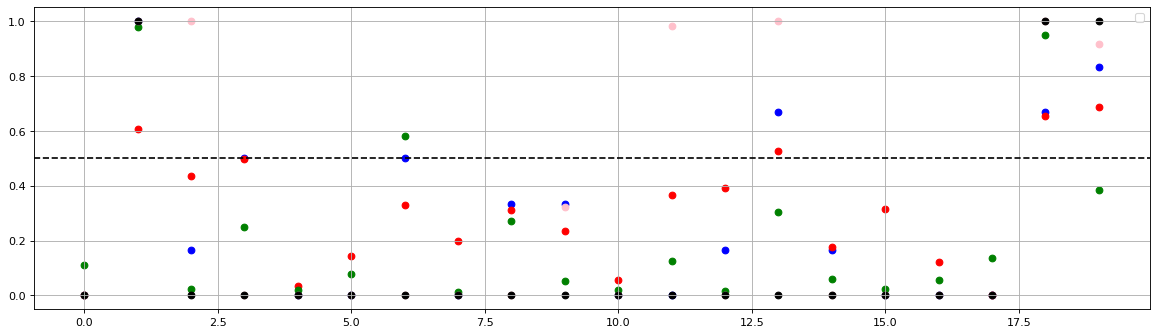

In [ ]:

figure(figsize=(18, 5), dpi=80)
plt.scatter(range(20),y_proba_KNN[0:20,1], c = 'blue')
plt.scatter(range(20),y_proba_PLS[0:20,1] ,c = 'red')
plt.scatter(range(20),y_proba_SVC[0:20,1], c = 'green')
plt.scatter(range(20),y_proba_SGDC[0:20,1], c = 'pink')
plt.scatter(range(20),y_proba_global[0:20], c = 'black')
plt.axhline(y=0.5, color = 'black', linestyle ='dashed')
plt.legend()
plt.grid()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc9dd6f5-feb8-4fcd-b3f6-b59a3fc6dae4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>